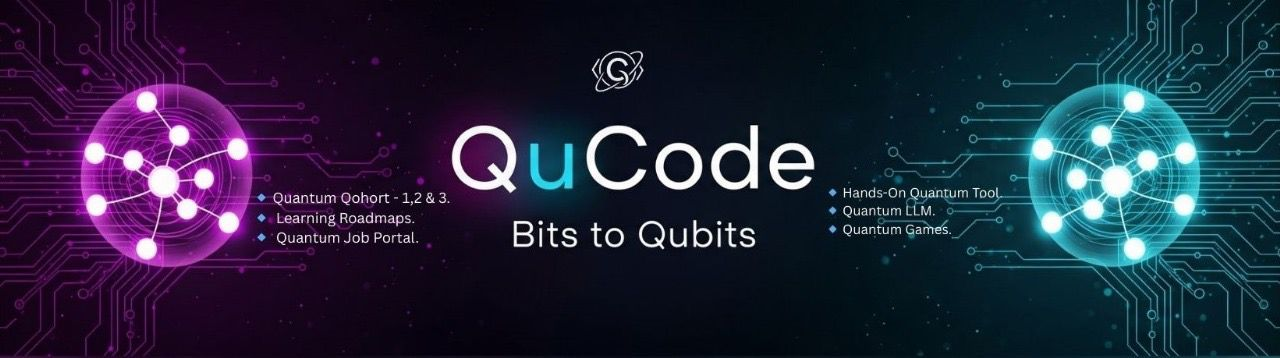


# QuCode 21 Days Challenge

Hello, Hola, ನಮಸ್ಕಾರ, నమస్తే, નમસ્તે, नमस्ते, ਸਤ ਸ੍ਰੀ ਅਕਾਲ, নমস্কার...

We are very excited to have you here with us as we explore Quantum Technologies together!  
In this session, we’ll gently introduce Qiskit and create our very first Quantum Circuit.  
Don’t worry—even if you’re already familiar with Qiskit, you’ll surely find something interesting here.  

If you ever get stuck or face any issues, feel free to drop a message on our [Discord](https://discord.gg/MNhGhZg83E) Server.  

For any other suggestions, feedback, or questions, please reach out to us at **team@qucode.in**.

## **Quantum Computers: What, Why, How...?**

Believe it or not, you can now program a quantum computer right from your couch (yes, pajamas allowed). But then comes the big question: what on Earth do we actually program? Or better yet: what even is a quantum computer?

To untangle this, we’ll start with something more familiar—classical computers. By revisiting their basic principles (with the same tools we’ll use later for quantum), the leap into quantum land will feel a lot less like falling into a sci-fi movie.

The first thing we need to talk about is *bits*. Think of them as the world’s tiniest alphabet—just two symbols, 0 and 1. With nothing but these two, we can still represent any number or piece of information.  

How? By using the **binary number system**, which is built on powers of two. Instead of stacking 10s, 100s, and 1000s like in everyday numbers, we stack 2s, 4s, 8s, 16s, and so on. For example, the number 213 in binary looks like `11010101`:  


\begin{aligned}
213 = & \phantom{+}(1\times 2^7) + (1\times 2^6) + (0\times 2^5) \\
      & + (1\times 2^4) + (0\times 2^3) + (1\times 2^2) \\
      & + (0\times 2^1) + (1\times 2^0)
\end{aligned}



Earlier we saw that computation is just about taking some input, performing operations, and getting output. In our quantum journey, this data will always come in the form of bits. Now that we know what bits are, let’s see how to actually do stuff with them.

A handy way to show this is with a circuit diagram: inputs go in from the left, outputs pop out on the right, and in between we have mysterious little symbols called gates (named for historical reasons, not because they look like your front door).

Here’s an example of a circuit for regular, bit-based computers. Don’t worry about understanding it—just get a feel for how these diagrams look.

![example of a classical circuit diagram](logic_gates.png)

For quantum computers, we use the same basic idea but have different conventions for how to represent inputs, outputs, and the symbols used for operations. Here is the “quantum circuit” that represents the same process as above.

![example of a quantum circuit diagram](quantum_circuit.png)

In the rest of this section, we will explain how to build quantum circuits. At the end, you'll know how to create the circuit above, what it does, and why it's useful.

## Qiskit Installation

In [2]:
## If you're on Google Colab Run the following every time kernel is restared.

!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install qiskit-ibm-runtime

## If you're using Jupyter notebook or any local python installation, it is recomened to create a environment and then install above listed packages.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.8/366.8 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.6 MB/s eta 0:00:00


Two different methods to set up a virtual environment to install Qiskit.
1. Using [venv](https://docs.python.org/3/library/venv.html), as explained in the [Qiskit installation guide](https://docs.quantum.ibm.com/guides/install-qiskit).
2. Using [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html), as explained in this video of [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4).

In [3]:
# Verify Installation

import qiskit

print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 2.1.2


Following notebook will work with qiskit version `>=2.0.0`

## Creating circuits with Qiskit

To create a quantum circuit, we will import the <code>QuantumCircuit</code> class, and create a new <code>QuantumCircuit</code> object.

<!-- ::: q-block.reminder -->

### Reminder

<details>
    <summary>Python basics (what’s all this about classes and objects?)</summary>
    
We know we can describe all information using a bunch of bits, which is how computers store and process everything, including quantum circuits! But it’s difficult for us humans to think about how we do this, and how we manipulate those bits to represent the circuits we want.

The <code>QuantumCircuit</code> class is a set of instructions for representing quantum circuits as bits.  The line <code>qc = QuantumCircuit(4, 2)</code> in the cell below is a constructor, which tells Python to set aside some bits in your computer that we’ll use to represent a quantum circuit. When we want to refer to this quantum circuit (or rather, the bits that represent this quantum circuit) we’ll use the variable ‘<code>qc</code>’. We say ‘<code>qc</code>’ refers to a "<code>QuantumCircuit</code> object".

<!-- vale off -->
    
This allows us humans to think about quantum circuits at a high, abstract level; we can say things like “add an X-gate” and Qiskit will take care of what we need to do to the bits in our computer to reflect this change.

</details>

<!-- ::: -->

On creating a quantum circuit, we need to tell [Python](gloss:python) how many qubits our circuit should have, and we can optionally also tell it how many classical bits our circuit should have. We need classical bits to store the measurements of our qubits, the reason for this will become clear later in this course.

## Your first quantum circuit

In a circuit, we typically need to do three jobs: First, encode the input, then do some actual computation, and finally extract an output. For your first quantum circuit, we'll focus on the last of these jobs. We start by creating a quantum circuit with 3 qubits and 3 outputs.

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [5]:
## Imports

from qiskit import QuantumCircuit, generate_preset_pass_manager # Basic Import
from qiskit.circuit import Parameter, QuantumRegister, ClassicalRegister # TO Define Parametric Circuit
from qiskit.quantum_info import SparsePauliOp  # To Define Obversables
from qiskit_aer import AerSimulator   # To Simulate Quantum Circuit and Operations
from qiskit_aer.primitives import EstimatorV2 as Estimator   ## To Calculate Expectation Values
import numpy as np
from qiskit_ibm_runtime.fake_provider import FakeTorino
import matplotlib.pyplot as plt
from types import SimpleNamespace

In [6]:
qubits = QuantumRegister(2)
bit = ClassicalRegister(2)

mycircuit = QuantumCircuit(qubits,bit)
# qc = QuantumCircuit(2,2)



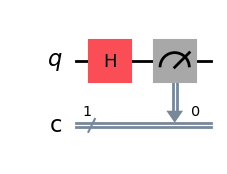

In [7]:
from qiskit import QuantumCircuit
# Create quantum circuit with 3 qubits and 3 classical bits
# (we'll explain why we need the classical bits later)
qc = QuantumCircuit(1,1)
qc.h(0)
# qc.z(1)
# qc.y(2)
qc.measure(0,0)
qc.draw("mpl")  # returns a drawing of the circuit

Finally the method <code>qc.draw()</code> creates a drawing of the circuit for us. Jupyter Notebooks evaluate the last line of a code cell and display it below the cell. Since <code>qc.draw()</code> [returns](gloss:return) a drawing, that’s what we’re seeing under the code. There are no gates in our circuit yet, so we just see some horizontal lines.

<!-- ::: q-block.reminder -->

### Reminder

<details>
    <summary>Python basics (what’s a method?)</summary>
    The <code>QuantumCircuit</code> class is a set of instructions for representing quantum circuits as bits, but when we want to change one of these circuits, we also need to know how to change the bits accordingly. In [Python](gloss:python), objects come with ‘methods’, which are sets of instructions for doing something with that object. In the cell above, the <code>.draw()</code> method looks at the circuit we’ve created and produces a human-readable drawing of that circuit.
    
</details>

<!-- ::: -->

Next, we need a way to tell our quantum computer to measure our qubits and record the results. To do this, we add a "measure" operation to our quantum circuit. We can do this with the `QuantumCircuit`'s `.measure()` method.

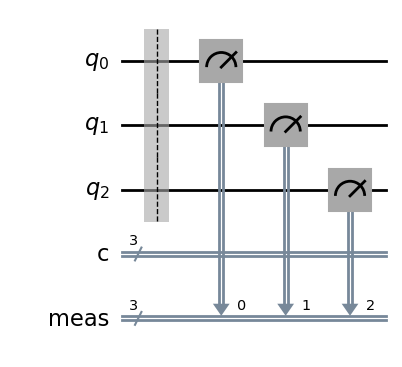

In [8]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 3)
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
# qc.measure([0,1,2], [2,0,1])
qc.measure_all()
qc.draw('mpl')

Next, let's see what the results of running this circuit would be. To do this, we'll use a quantum simulator, which is a standard computer calculating what an ideal quantum computer would do.

Simulating a quantum computer is believed to be difficult for classical computers, as the best algorithms we have grow exponentially with the number of qubits. As such, these simulations are only possible for circuits with small numbers of qubits (up to ~30 qubits), or certain types of circuits for which we can use some tricks to speed up the simulation. Nevertheless, simulators are very useful tools for designing smaller quantum circuits.

Let's import Qiskit’s simulator (called Aer), and make a new simulator object.

In [9]:
from qiskit_aer import AerSimulator  # pylint: disable=import-error, no-name-in-module
sim = AerSimulator()  # make new simulator object

To do the simulation, we can use the simulator’s <code>.run()</code> method. This returns a "job", which contains information about the experiment, such as whether the experiment is running or completed, the backend it ran on, and (importantly for us), the results of the experiment.

To get the results from the job, we use the results method, and the most popular way to view the results is as a dictionary of "counts".

In [11]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'000 000': 1024}

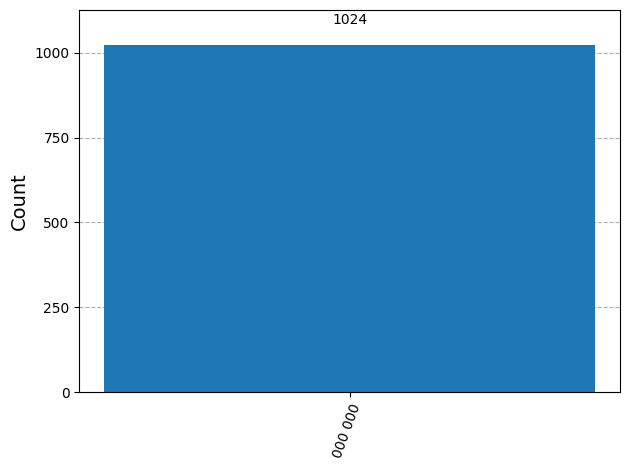

In [12]:
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts())

The keys in counts dictionary are bit-strings, and the values are the number of times that bit-string was measured. Quantum computers can have randomness in their results, so it's common to repeat the circuit a few times. This circuit was repeated 1024 times, which is the default number of times to repeat a circuit in Qiskit. By convention, qubits always start in the state `0`, and since we are doing nothing to them before measurement, the results are always `0`.

### Encoding an input

Now let's look at how to encode a different binary string as an input. For this, we need what is known as a NOT gate. This is the most basic operation that you can do in a computer. It simply flips the bit value: 0 becomes 1 and 1 becomes 0. For qubits, we use a gate known as the _X-gate_ for this.

Below, we’ll create a new circuit dedicated to the job of encoding:

In [13]:
# Create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3, 3)
qc.x([0,1])  # Perform X-gates on qubits 0 & 1
qc.measure([0,1,2], [0,1,2])
qc.draw()    # returns a drawing of the circuit

┌───┐┌─┐   
q_0: ┤ X ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └┬─┬┘ ║ └╥┘
q_2: ─┤M├──╫──╫─
      └╥┘  ║  ║ 
c: 3/══╩═══╩══╩═
       2   0  1

And let's simulate our circuit to see the results:

In [15]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'011': 1024}

# Gate Rotation

In [21]:
from bloch_sphere.animate_bloch import do_or_save_animation, AnimState

ModuleNotFoundError: No module named 'bloch_sphere'

## X Gate

In [17]:
@do_or_save_animation('my_animation', save=False, fps=60, preview=True)
def animate(state: AnimState):
    state.x_gate()
    #state.y_gate()
    #state.z_gate()
    state.wait(1)  # Pause at the end

NameError: name 'do_or_save_animation' is not defined

## Y Gate

In [18]:

@do_or_save_animation('my_animation', save=False, fps=60, preview=True)
# Or
#@do_or_save_animation('my_animation', save='gif', fps=20, preview=True)
#@do_or_save_animation('my_animation', save='mp4', fps=20, preview=False)
def animate(state: AnimState):
    #state.x_gate()
    state.y_gate()
    #state.z_gate()
    state.wait(1)  # Pause at the end

NameError: name 'do_or_save_animation' is not defined

## Z Gate

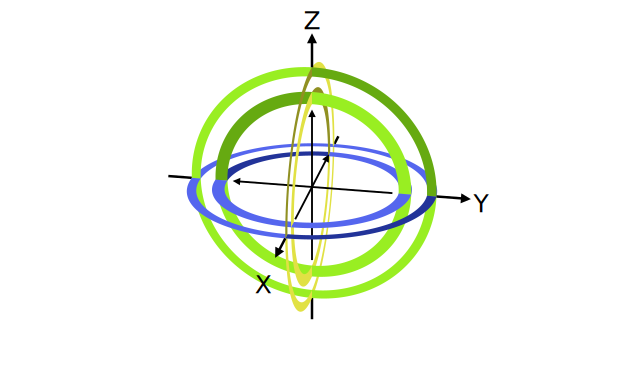

In [ ]:


@do_or_save_animation('my_animation', save=False, fps=60, preview=True)
# Or
#@do_or_save_animation('my_animation', save='gif', fps=20, preview=True)
#@do_or_save_animation('my_animation', save='mp4', fps=20, preview=False)
def animate(state: AnimState):
    #state.x_gate()
    # state.y_gate()
    state.z_gate()
    state.wait(1)  # Pause at the end

## H Gate

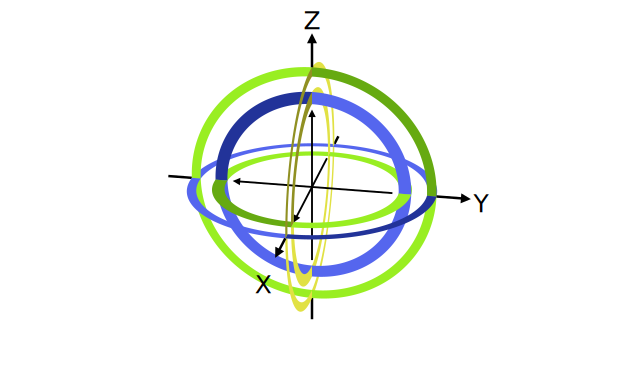

In [ ]:
@do_or_save_animation('my_animation', save=False, fps=40, preview=True)
def animate(state: AnimState):
    #state.x_gate()
    state.h_gate()
    #state.y_gate()
    #state.z_gate()
    state.wait(1)  # Pause at the end

## Example of Hardware Execution

In [83]:
from qiskit_ibm_runtime import QiskitRuntimeService

api_key = "Removed"
crn = "Removed"

QiskitRuntimeService.save_account(
     channel="ibm_quantum_platform",
     token=api_key,
     overwrite=True,
     instance=crn,
     name="ra-qucode"
)

service = QiskitRuntimeService(name="ra-qucode")
service.saved_accounts()
hardware = service.backends()
print(f"The quantum computers available for you are {hardware}")   #List of Available QPU's

The quantum computers available for you are [<IBMBackend('ibm_torino')>, <IBMBackend('ibm_brisbane')>]


In [84]:
# Choose any one of the available Hardware

# hardware = service.backend("ibm_torino")
hardware = service.backend("ibm_brisbane")

In [85]:
from qiskit_ibm_runtime import EstimatorV2
f = FakeTorino()
noisy_simulator = AerSimulator.from_backend(hardware)  # Define Simulator with noise model of Hardware
noisy_estimator = EstimatorV2(mode = f)  # Initilize Estimator with Noisy Simulator
hardware_estimator = EstimatorV2(mode = hardware)  # Initilize Estimator with Hardware

To Execute the cirucit with Noisy Simulator or with Hardware, there usually are 4 different steps to be followed.

1. **Map** problem to quantum circuits and operators
2. **Optimize** for target hardware
3. **Execute** on target hardware
4. **Post-process** results

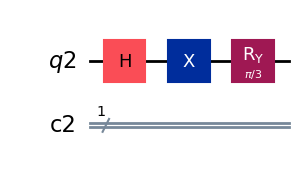

In [87]:
q = QuantumRegister(1)   # Initilize a 1 Quantum Register (1 qubit)
c = ClassicalRegister(1)  # Initilize 1 Classical Register (1 bit)
FirstCircuit = QuantumCircuit(q,c)  # Initilize a Quantum Circuit named "FirstCircuit" with "q" qubits and "c" classical registers
FirstCircuit.h(0) # Apply "H" Gate on FirstCircuit's first qubit (Zeroth Qubit)
FirstCircuit.x(0) # Apply "X" Gate on FirstCircuit's first qubit (Zeroth Qubit)
FirstCircuit.ry(np.pi/3,0) # Apply "Ry" Gate on FirstCircuit's first qubit (Zeroth Qubit) ; Rotation along Y axis on bloch sphere
#FirstCircuit.draw()  # Print the circuit
FirstCircuit.draw("mpl")  # Optional for better visualization but might require additional modules when running on Local

Execute on Simulator to find Expectation Value

In [88]:
simulator = AerSimulator() # Define Simulator
estimator = Estimator.from_backend(simulator)  # Define Estimator which can simulate circuit

observable1 = SparsePauliOp("X")  # Define Observable1 X ; X on First Qubit and X on Second Qubit
observable2 = SparsePauliOp("I")  # Define Observable2 Y ; Y on First Qubit and Y on Second Qubit
observable3 = SparsePauliOp("Z")  # Define Observable3 Z ; Y on First Qubit and Y on Second Qubit

pub = (FirstCircuit,[observable1,observable2,observable3])

result = estimator.run([pub]).result()
expectation_value_op_1 = result[0].data.evs[0]
expectation_value_op_2 = result[0].data.evs[1]
expectation_value_op_3 = result[0].data.evs[2]

print(f"Expectation Value of Observable 1 is {expectation_value_op_1}")
print(f"Expectation Value of Observable 2 is {expectation_value_op_2}")
print(f"Expectation Value of Observable 3 is {expectation_value_op_3}")


Expectation Value of Observable 1 is 0.4999999999999999
Expectation Value of Observable 2 is 0.9999999999999999
Expectation Value of Observable 3 is -0.8660254037844385


In [89]:
## Map the Problem to Quantum Circuit and Operators

# Here We'll use the previously defined circuit and operators.

## Optimize for Target Hardware (Create a "Transpiled" circuit)



## Convert the circuit which is compatable with hardware from which noise model is taken
## If same syatem is used in noisy simulator and hardware then both the pass manager will produce same circuit


# # Define a Pass Manager which can convert any circuit into given hardware compatible circuit
# pm_noisy_sim = generate_preset_pass_manager(backend=noisy_simulator)
# # Convert our circuit into Hardware compatible circuit
# FirstCircuit_Transpiled_noisy_sim = pm_noisy_sim.run(FirstCircuit)



# Convert the circuit which is compatable with hardware
pm_hardware = generate_preset_pass_manager(backend=hardware)
# Convert our circuit into Hardware compatible circuit
FirstCircuit_Transpiled_hardware = pm_hardware.run(FirstCircuit)



## You can print the circuit to see how it's changed from your original circuit, however the quantum state represented by circuit remains the same.

## We need to convert the operators/observable in the hardware compatible representation as well
## We can use Transpiled Circuit for the same.

obs_1 = observable1.apply_layout(FirstCircuit_Transpiled_hardware.layout)
obs_2 = observable2.apply_layout(FirstCircuit_Transpiled_hardware.layout)
obs_3 = observable3.apply_layout(FirstCircuit_Transpiled_hardware.layout)

In [90]:
## Execute on Noisy Simulator

pub_ns = (FirstCircuit_Transpiled_hardware,[obs_1,obs_2,obs_3])


result_ns = noisy_estimator.run([pub_ns]).result()
expectation_value_op_1_ns = result_ns[0].data.evs[0]
expectation_value_op_2_ns = result_ns[0].data.evs[1]
expectation_value_op_3_ns = result_ns[0].data.evs[2]

print(f"Expectation Value of Observable 1 is {expectation_value_op_1_ns}")
print(f"Expectation Value of Observable 2 is {expectation_value_op_2_ns}")
print(f"Expectation Value of Observable 3 is {expectation_value_op_3_ns}")

Expectation Value of Observable 1 is 0.16552734375
Expectation Value of Observable 2 is 1.0
Expectation Value of Observable 3 is -0.72705078125


In [91]:
## Execute on target hardware

pub_h = (FirstCircuit_Transpiled_hardware,[obs_1,obs_2,obs_3])


result_h = hardware_estimator.run([pub_h]).result()
expectation_value_op_1_h = result_h[0].data.evs[0]
expectation_value_op_2_h = result_h[0].data.evs[1]
expectation_value_op_3_h = result_h[0].data.evs[2]

print(f"Expectation Value of Observable 1 is {expectation_value_op_1_h}")
print(f"Expectation Value of Observable 2 is {expectation_value_op_2_h}")
print(f"Expectation Value of Observable 3 is {expectation_value_op_3_h}")

Expectation Value of Observable 1 is 0.501283255086072
Expectation Value of Observable 2 is 1.0
Expectation Value of Observable 3 is -0.8613458528951486


# Visulize the Results

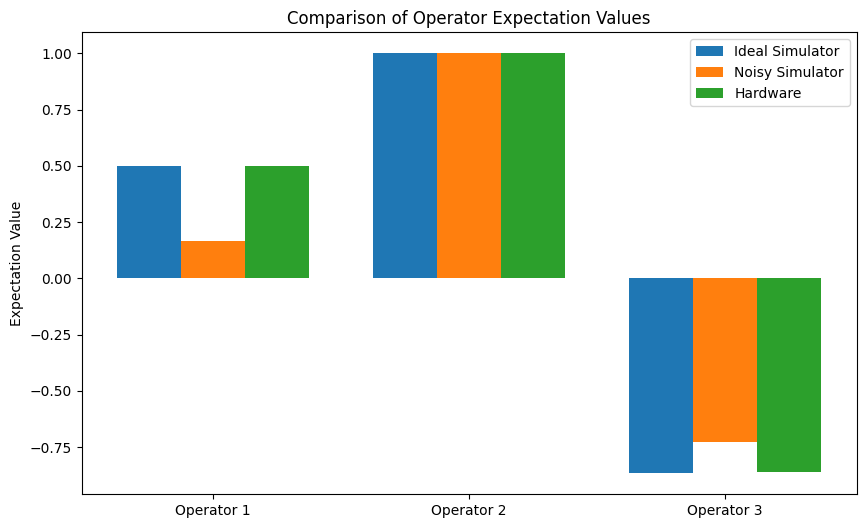

In [92]:
ideal_sim_values = [expectation_value_op_1, expectation_value_op_2, expectation_value_op_3]
noisy_sim_values = [expectation_value_op_1_ns, expectation_value_op_2_ns, expectation_value_op_3_ns]
hardware_values = [expectation_value_op_1_h, expectation_value_op_2_h, expectation_value_op_3_h]

labels = ['Operator 1', 'Operator 2', 'Operator 3']
x = np.arange(len(labels))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, ideal_sim_values, width, label='Ideal Simulator')
ax.bar(x,         noisy_sim_values, width, label='Noisy Simulator')
ax.bar(x + width, hardware_values,  width, label='Hardware')
ax.set_ylabel('Expectation Value')
ax.set_title('Comparison of Operator Expectation Values')
ax.set_xticks(x, labels)
ax.legend()

plt.show()